<a href="https://colab.research.google.com/github/rameshavinash94/Clustering_Assignment/blob/main/Clustering_Assignment_Avinash_ramesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering Assignment**

In [109]:
#importing packages
import pandas as pd
import numpy as np
import scipy.io as sio
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix, pair_confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# **Dataset 1: geometry (centroid_edges.mat)**

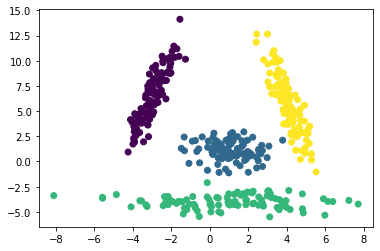

In [ ]:
#loading data from centroid_edges.mat
ce_data = sio.loadmat('centroid_edges.mat')
#data visualization: before clustering - based on ground truth
plt.scatter(ce_data['data'][0], ce_data['data'][1], c = ce_data['classlabels'][0])

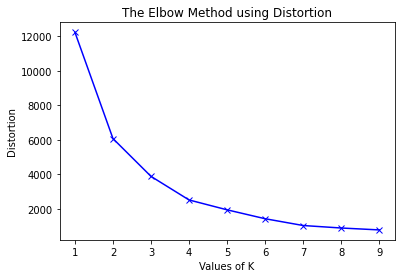

In [107]:
#From the ground truth, we know the no.of clusters are 4. Lets use Elbow menthod to check no.of clusters
#finding the optimal value of K using elbow method
X_ce = [i for i in zip(ce_data['data'][0], ce_data['data'][1])]

Distortion=[]
for x in range(1,10):
  kmeans = KMeans(n_clusters=x,max_iter=50)
  kmeans.fit(X_ce)
  Distortion.append(kmeans.inertia_)

#plot to view the optimal value of K
K = range(1, 10)
plt.plot(K, Distortion, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

silhouette_score - 0.5054676303452531
calinski_harabasz_score - 506.876475800675
davies_bouldin_score - 0.7021112508878435


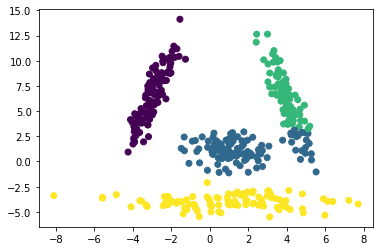

In [ ]:
#Clustering using K-means
X_ce = [i for i in zip(ce_data['data'][0], ce_data['data'][1])]
kmeans_ce = KMeans(n_clusters=4).fit(X_ce)
print("silhouette_score -", silhouette_score(X_ce, kmeans_ce.labels_, metric='euclidean'))
print("calinski_harabasz_score -", calinski_harabasz_score(X_ce, kmeans_ce.labels_))
print("davies_bouldin_score -", davies_bouldin_score(X_ce, kmeans_ce.labels_))
plt.scatter(ce_data['data'][0], ce_data['data'][1], c = kmeans_ce.labels_)

silhouette_score - 0.4885070431026247
calinski_harabasz_score - 466.1403359223708
davies_bouldin_score - 0.6975554549950695


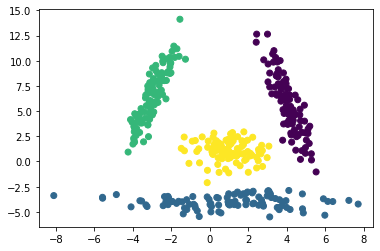

In [ ]:
#Clustering using AgglomerativeClustering
Aggcluster_ce = AgglomerativeClustering(n_clusters=4).fit(X_ce)
print("silhouette_score -", silhouette_score(X_ce, Aggcluster_ce.labels_, metric='euclidean'))
print("calinski_harabasz_score -", calinski_harabasz_score(X_ce, Aggcluster_ce.labels_))
print("davies_bouldin_score -", davies_bouldin_score(X_ce, Aggcluster_ce.labels_))
plt.scatter(ce_data['data'][0], ce_data['data'][1], c = Aggcluster_ce.labels_)

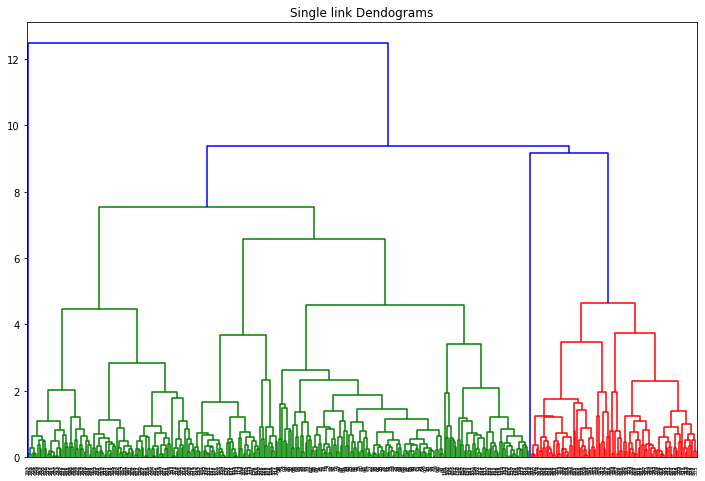

In [111]:
#average link
plt.figure(figsize=(12, 8))
plt.title("Average link Dendograms")
dend = shc.dendrogram(shc.linkage(X_ce, method="average"))
plt.show()

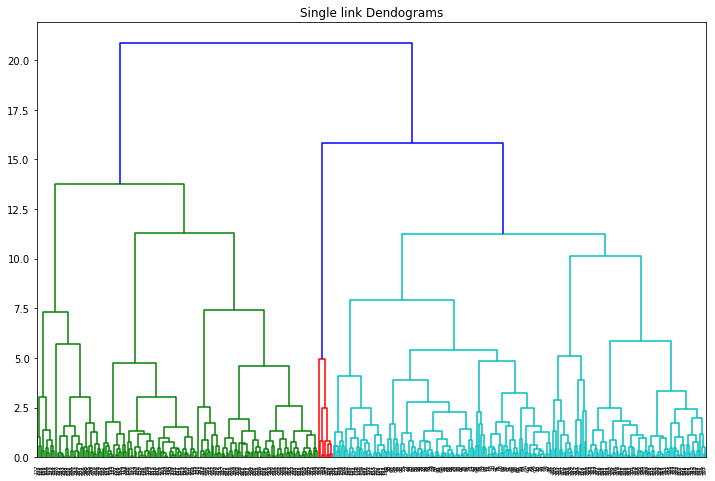

In [112]:
#complete  link
plt.figure(figsize=(12, 8))
plt.title("Complete link Dendograms")
dend = shc.dendrogram(shc.linkage(X_ce, method="complete"))
plt.show()

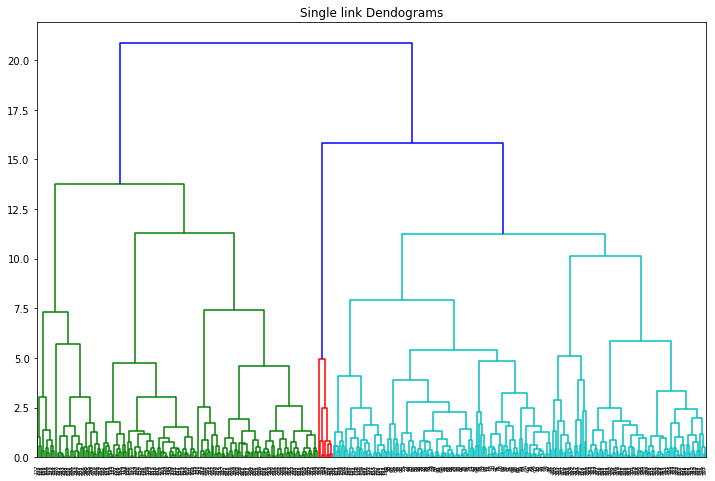

In [113]:
#single link
plt.figure(figsize=(12, 8))
plt.title("Single link Dendograms")
dend = shc.dendrogram(shc.linkage(X_ce, method="complete"))
plt.show()

# **Dataset 2 - density (points.mat)**

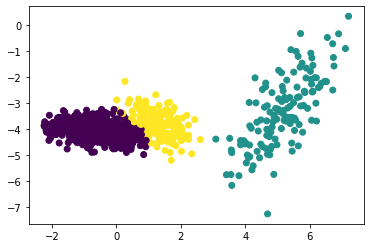

In [ ]:
#loading data from points.mat file
point = sio.loadmat('points.mat')
#data visualization: before clustering - based on ground truth
plt.scatter(point['data'][0], point['data'][1], c = point['classlabels'][0])

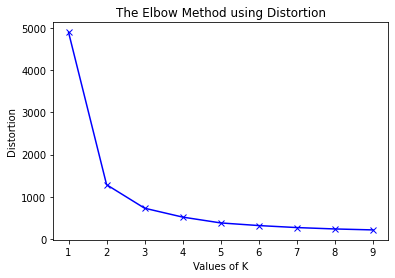

In [118]:
#From the ground truth, we know the no.of clusters are 3. Lets use Elbow menthod to check no.of clusters
#finding the optimal value of K using elbow method
X_pt = [i for i in zip(point['data'][0], point['data'][1])]

Distortion=[]
for x in range(1,10):
  kmeans = KMeans(n_clusters=x,max_iter=50)
  kmeans.fit(X_pt)
  Distortion.append(kmeans.inertia_)

#plot to view the optimal value of K
K = range(1, 10)
plt.plot(K, Distortion, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

silhouette_score - 0.5402740863628781
calinski_harabasz_score - 2840.8959538844033
davies_bouldin_score - 0.6188835870903427


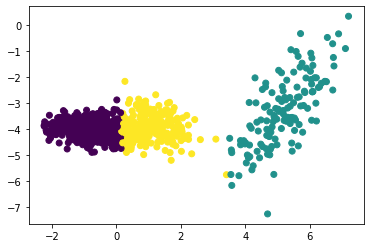

In [ ]:
X_pt = [i for i in zip(point['data'][0], point['data'][1])]
kmeans_pt = KMeans(n_clusters=3).fit(X_pt)
print("silhouette_score -", silhouette_score(X_pt, kmeans_pt.labels_, metric='euclidean'))
print("calinski_harabasz_score -", calinski_harabasz_score(X_pt, kmeans_pt.labels_))
print("davies_bouldin_score -", davies_bouldin_score(X_pt, kmeans_pt.labels_))
plt.scatter(point['data'][0], point['data'][1], c = kmeans_pt.labels_)

silhouette_score - 0.6772381237923882
calinski_harabasz_score - 1749.2480564171663
davies_bouldin_score - 0.594161404001212


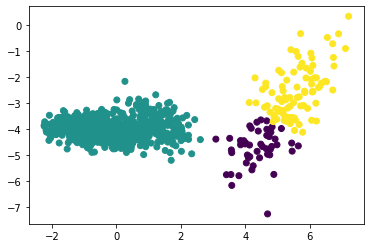

In [ ]:
Aggcluster_pt = AgglomerativeClustering(n_clusters=3, affinity= 'l1', linkage= 'average').fit(X_pt)
print("silhouette_score -", silhouette_score(X_pt, Aggcluster_pt.labels_, metric='euclidean'))
print("calinski_harabasz_score -", calinski_harabasz_score(X_pt, Aggcluster_pt.labels_))
print("davies_bouldin_score -", davies_bouldin_score(X_pt, Aggcluster_pt.labels_))
plt.scatter(point['data'][0], point['data'][1], c = Aggcluster_pt.labels_)

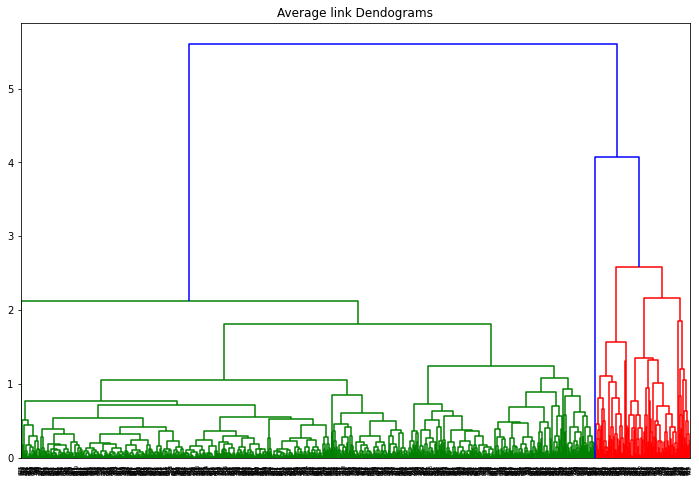

In [119]:
#average link
plt.figure(figsize=(12, 8))
plt.title("Average link Dendograms")
dend = shc.dendrogram(shc.linkage(X_pt, method="average"))
plt.show()

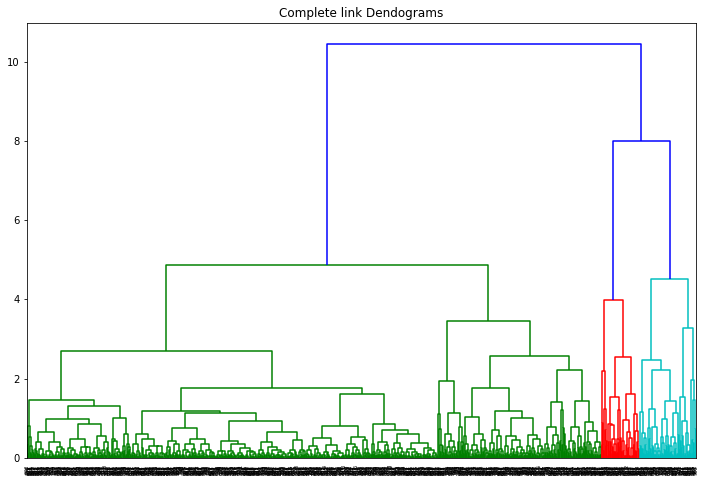

In [120]:
#complete  link
plt.figure(figsize=(12, 8))
plt.title("Complete link Dendograms")
dend = shc.dendrogram(shc.linkage(X_pt, method="complete"))
plt.show()

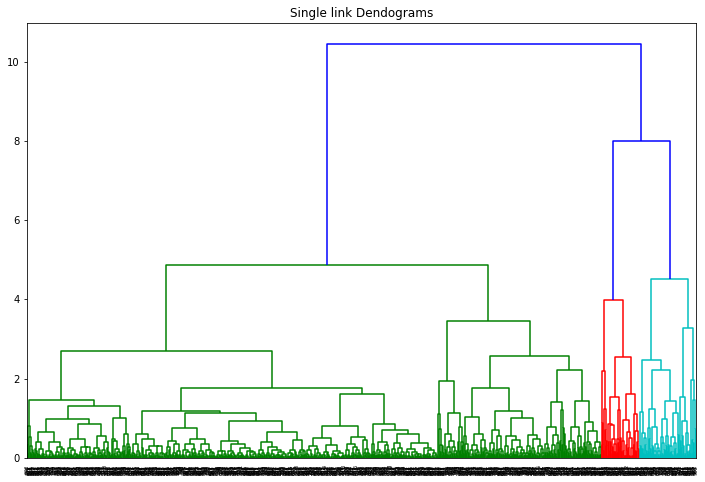

In [121]:
#single link
plt.figure(figsize=(12, 8))
plt.title("Single link Dendograms")
dend = shc.dendrogram(shc.linkage(X_pt, method="complete"))
plt.show()

# **Dataset 3: image (binaryalphadigs.mat)**

In [ ]:
binary = sio.loadmat('binaryalphadigs.mat')

In [ ]:
binary['dat'].shape

(36, 39)

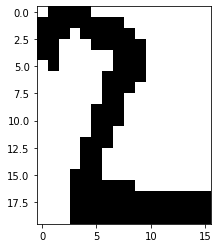

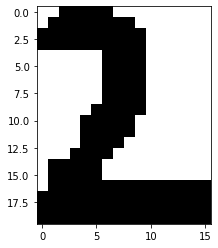

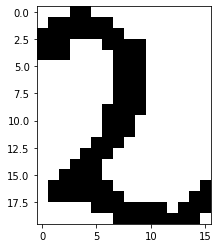

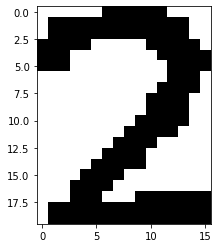

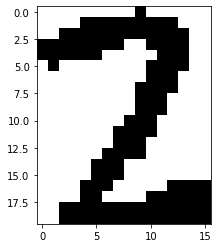

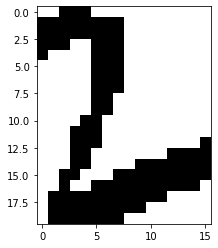

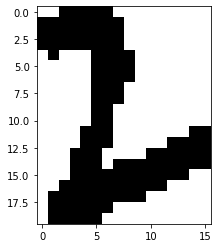

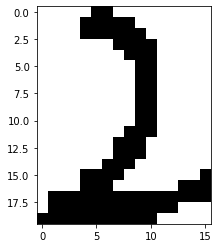

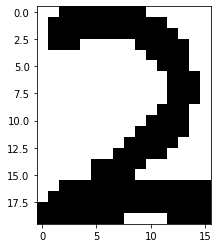

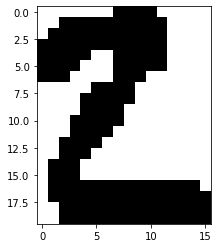

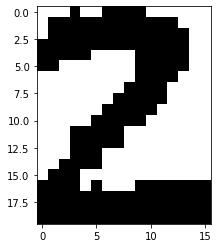

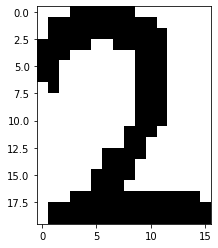

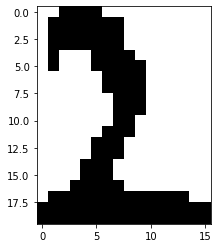

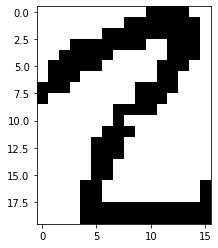

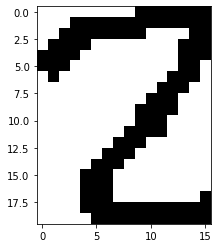

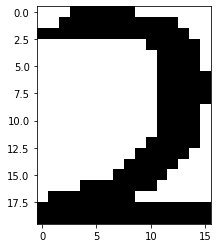

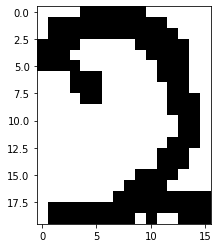

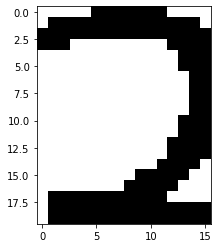

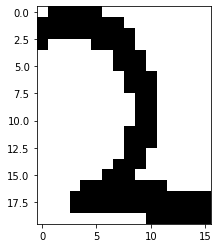

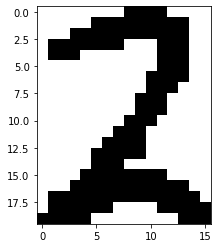

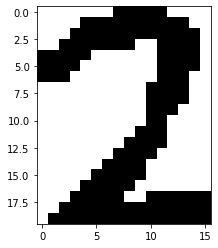

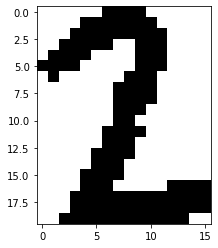

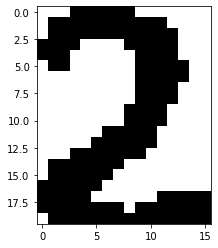

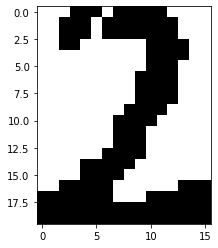

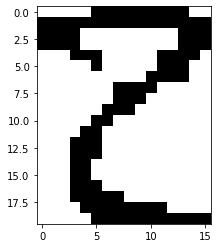

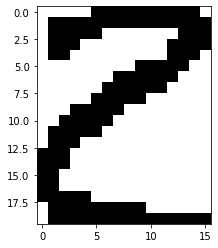

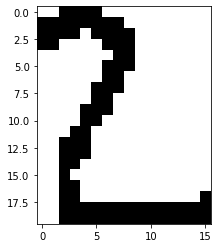

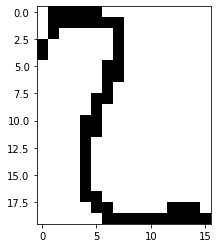

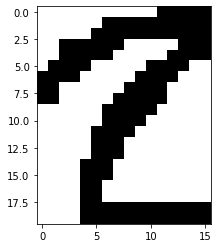

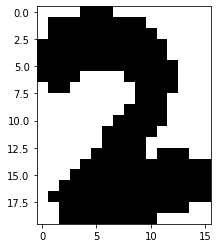

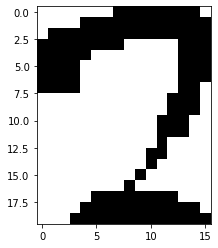

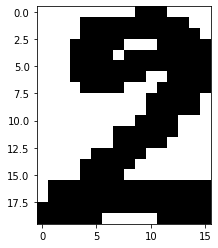

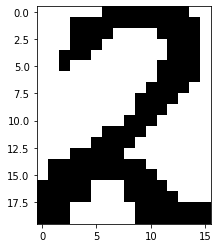

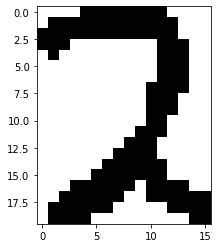

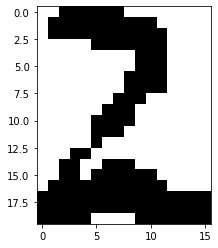

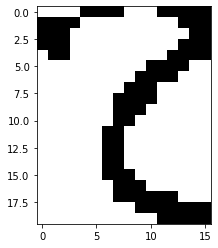

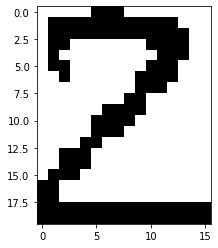

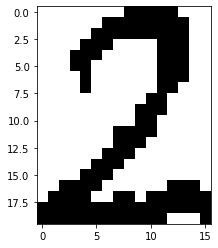

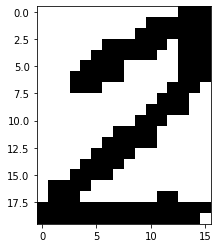

In [ ]:
# for i in range(0, binary['dat'].shape[0]):
#     for j in range(0, binary['dat'].shape[1]):
#         plt.imshow(binary['dat'][i][j], cmap='Greys')
#         plt.show()
for i in binary['dat'][2]:
    plt.imshow(i, cmap='Greys')
    plt.show()

In [ ]:
X_list = []
pca = PCA(2)  # project from 64 to 2 dimensions
for i in range(0, binary['dat'].shape[0]):
    for j in range(0, binary['dat'].shape[1]):
        projected = pca.fit_transform(binary['dat'][i][j])
        X_list.append(np.concatenate(projected))
X_binary = np.array(X_list)
print(binary['dat'][0][0].shape)
print(projected.shape)

(20, 16)
(20, 2)


Text(0, 0.5, 'cumulative explained variance')

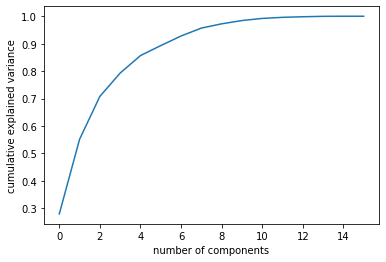

In [ ]:
pca = PCA().fit(binary['dat'][0][0])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
X_binary.shape

(1404, 40)

In [ ]:
print("explained variance ratio", pca.explained_variance_ratio_)
print("total explained variance ratio", sum(pca.explained_variance_ratio_))
print("explained variance", pca.explained_variance_)

explained variance ratio [2.79807694e-01 2.71903365e-01 1.56385624e-01 8.49249003e-02
 6.36798082e-02 3.62905123e-02 3.50669282e-02 2.87448742e-02
 1.55342372e-02 1.19697244e-02 7.76618246e-03 3.96388355e-03
 2.11987910e-03 1.52114672e-03 3.21240019e-04 6.71086016e-35]
total explained variance ratio 1.0
explained variance [9.96262658e-01 9.68119087e-01 5.56815130e-01 3.02377342e-01
 2.26733633e-01 1.29213324e-01 1.24856721e-01 1.02346881e-01
 5.53100604e-02 4.26185186e-02 2.76516970e-02 1.41135117e-02
 7.54788534e-03 5.41608294e-03 1.14378354e-03 2.38941942e-34]


In [ ]:
print(binary['dat'].shape)
print(binary['dat'][0][0].shape)

(36, 39)
(20, 16)


In [ ]:
kmeans = KMeans(n_clusters=36, random_state=0).fit(X_binary)
print("silhouette_score -", silhouette_score(X_binary, kmeans.labels_, metric='euclidean'))
print("calinski_harabasz_score -", calinski_harabasz_score(X_binary, kmeans.labels_))
print("davies_bouldin_score -", davies_bouldin_score(X_binary, kmeans.labels_))

silhouette_score - 0.11649252204311544
calinski_harabasz_score - 62.0496653750208
davies_bouldin_score - 1.9089178604711121


In [ ]:
Aggcluster = AgglomerativeClustering(n_clusters=36, affinity= 'l1', linkage= 'average').fit(X_binary)
print("silhouette_score -", silhouette_score(X_binary, Aggcluster.labels_, metric='euclidean'))
print("calinski_harabasz_score -", calinski_harabasz_score(X_binary, Aggcluster.labels_))
print("davies_bouldin_score -", davies_bouldin_score(X_binary, Aggcluster.labels_))
# print("contingency_matrix -", contingency_matrix(ce['classlabels'][0], kmeans.labels_))
# print("pair_confusion_matrix -", pair_confusion_matrix(ce['classlabels'][0], kmeans.labels_))

silhouette_score - 0.08631649777346191
calinski_harabasz_score - 38.854070681366544
davies_bouldin_score - 1.7363651567553338


# **Dataset 4: text (20news_w100.mat)**

<BarContainer object of 4 artists>

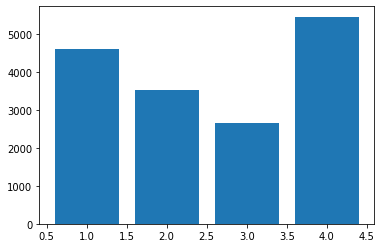

In [ ]:
news_data = sio.loadmat('20news_w100.mat')
a= dict()
for i in news_data['newsgroups'][0]:
    if i in a.keys():
        a[i] += 1
    else:
        a[i] = 0
plt.bar(a.keys(), a.values())

 **There are 4 news categories: "comp.*","rec.*","sci.*","talk.*"**

In [ ]:
news_data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Sat Jun 29 15:07:10 2002',
 '__version__': '1.0',
 'documents': <100x16242 sparse matrix of type '<class 'numpy.uint8'>'
 	with 65451 stored elements in Compressed Sparse Column format>,
 'groupnames': array([[array(['comp.*'], dtype='<U6'), array(['rec.*'], dtype='<U5'),
         array(['sci.*'], dtype='<U5'), array(['talk.*'], dtype='<U6')]],
       dtype=object),
 'newsgroups': array([[1, 1, 1, ..., 4, 4, 4]], dtype=uint8),
 'wordlist': array([[array(['aids'], dtype='<U4'), array(['baseball'], dtype='<U8'),
         array(['bible'], dtype='<U5'), array(['bmw'], dtype='<U3'),
         array(['cancer'], dtype='<U6'), array(['car'], dtype='<U3'),
         array(['card'], dtype='<U4'), array(['case'], dtype='<U4'),
         array(['children'], dtype='<U8'),
         array(['christian'], dtype='<U9'),
         array(['computer'], dtype='<U8'), array(['course'], dtype='<U6'),
         array(['data'], d

In [ ]:
word_list = np.array([j for i in news_data['wordlist'][0] for j in i])

In [ ]:
word_list

array(['aids', 'baseball', 'bible', 'bmw', 'cancer', 'car', 'card',
       'case', 'children', 'christian', 'computer', 'course', 'data',
       'dealer', 'disease', 'disk', 'display', 'doctor', 'dos', 'drive',
       'driver', 'earth', 'email', 'engine', 'evidence', 'fact', 'fans',
       'files', 'food', 'format', 'ftp', 'games', 'god', 'government',
       'graphics', 'gun', 'health', 'help', 'hit', 'hockey', 'honda',
       'human', 'image', 'insurance', 'israel', 'jesus', 'jews', 'launch',
       'law', 'league', 'lunar', 'mac', 'mars', 'medicine', 'memory',
       'mission', 'moon', 'msg', 'nasa', 'nhl', 'number', 'oil', 'orbit',
       'patients', 'pc', 'phone', 'players', 'power', 'president',
       'problem', 'program', 'puck', 'question', 'religion', 'research',
       'rights', 'satellite', 'science', 'scsi', 'season', 'server',
       'shuttle', 'software', 'solar', 'space', 'state', 'studies',
       'system', 'team', 'technology', 'university', 'version', 'video',
      

### **CASE 1 (TF-IDF and cluster using Kmeans)**

**Lets Understand the Data**

the Documents are Sparse logical, so lets conver to dense format. I Guess, The documents are stored in Term-Document Frequency format. Lets convert to Pandas dataframe and visualize the data for understanding

In [ ]:
news_data['documents']

<100x16242 sparse matrix of type '<class 'numpy.uint8'>'
	with 65451 stored elements in Compressed Sparse Column format>

In [ ]:
#convert the document to Dense
B = news_data['documents'].todense()

In [ ]:
B[:,:]

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [ ]:
#convert to 1D
Document1 = B.reshape(-1)

In [ ]:
#conver to 1D array
A = np.squeeze(np.asarray(Document1))

In [ ]:
A

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
#creating pandas Dataframe
import pandas as pd
data = B
columns = ['Document {}'.format(x) for x in range(0,16242)]
df = pd.DataFrame(data = data, 
                  index = word_list, 
                  columns = columns)

In [ ]:
#mapping documents with category
mapping_docs_category = {1:'comp.*',2:'rec.*',3:'sci.*',4:'talk.*'}
Document_Cat = pd.Series(news_data['newsgroups'].flatten())
Document_Category = Document_Cat.map(mapping_docs_category)

In [ ]:
Document_Category

0        comp.*
1        comp.*
2        comp.*
3        comp.*
4        comp.*
          ...  
16237    talk.*
16238    talk.*
16239    talk.*
16240    talk.*
16241    talk.*
Length: 16242, dtype: object

In [ ]:
#view dataframe
df

,Document 0,Document 1,Document 2,Document 3,Document 4,Document 5,Document 6,Document 7,Document 8,Document 9,Document 10,Document 11,Document 12,Document 13,Document 14,Document 15,Document 16,Document 17,Document 18,Document 19,Document 20,Document 21,Document 22,Document 23,Document 24,Document 25,Document 26,Document 27,Document 28,Document 29,Document 30,Document 31,Document 32,Document 33,Document 34,Document 35,Document 36,Document 37,Document 38,Document 39,...,Document 16202,Document 16203,Document 16204,Document 16205,Document 16206,Document 16207,Document 16208,Document 16209,Document 16210,Document 16211,Document 16212,Document 16213,Document 16214,Document 16215,Document 16216,Document 16217,Document 16218,Document 16219,Document 16220,Document 16221,Document 16222,Document 16223,Document 16224,Document 16225,Document 16226,Document 16227,Document 16228,Document 16229,Document 16230,Document 16231,Document 16232,Document 16233,Document 16234,Document 16235,Document 16236,Document 16237,Document 16238,Document 16239,Document 16240,Document 16241
aids,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
baseball,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bible,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0
bmw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cancer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
water,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
win,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
windows,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
won,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#lets transpose the dataframe for further udnerstanding
Document_Term = df.T

In [ ]:
#add the document category
Document_Term['Category_name'] = Document_Category.values
Document_Term['Category_id'] = Document_Cat.values

In [ ]:
#view Document Term
Document_Term

,aids,baseball,bible,bmw,cancer,car,card,case,children,christian,computer,course,data,dealer,disease,disk,display,doctor,dos,drive,driver,earth,email,engine,evidence,fact,fans,files,food,format,ftp,games,god,government,graphics,gun,health,help,hit,hockey,...,orbit,patients,pc,phone,players,power,president,problem,program,puck,question,religion,research,rights,satellite,science,scsi,season,server,shuttle,software,solar,space,state,studies,system,team,technology,university,version,video,vitamin,war,water,win,windows,won,world,Category_name,Category_id
Document 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,comp.*,1
Document 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,comp.*,1
Document 2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,comp.*,1
Document 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,comp.*,1
Document 4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,comp.*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Document 16237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,talk.*,4
Document 16238,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,talk.*,4
Document 16239,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,talk.*,4
Document 16240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,talk.*,4


In [ ]:
#lets calculate IDf using the formula
# IDF formula = log [ (1 + n) / (1 + df(t)) ] + 1.
IDF={}
for x in Document_Term.columns[:-2]:
  IDF[x]=(np.log((1+16242)/(1+sum(Document_Term[x].astype(int))))+1)

In [ ]:
#Print IDF values for each word
IDF

{'aids': 6.110449847048824,
 'baseball': 4.583949986216718,
 'bible': 4.403848186161076,
 'bmw': 5.329441310697544,
 'cancer': 6.080296808878137,
 'car': 3.9490051971460214,
 'card': 4.024651004873522,
 'case': 3.365667636677884,
 'children': 4.137219522907127,
 'christian': 3.7886625470708424,
 'computer': 3.6797049052321666,
 'course': 3.3289721773917966,
 'data': 3.9525366899274927,
 'dealer': 5.288245554259277,
 'disease': 5.417302666488879,
 'disk': 4.527900834831055,
 'display': 4.575119906768445,
 'doctor': 5.297254624201643,
 'dos': 4.411283164648594,
 'drive': 3.7806864330008336,
 'driver': 4.60184755567426,
 'earth': 4.291843127784581,
 'email': 3.1265216623124,
 'engine': 5.03245684558345,
 'evidence': 4.005818056540429,
 'fact': 3.2488322265616705,
 'fans': 4.968569578132199,
 'files': 4.218444962829713,
 'food': 5.008441969379576,
 'format': 4.9556244135401615,
 'ftp': 4.595098373699331,
 'games': 4.260870806931942,
 'god': 3.5176349095241988,
 'government': 3.732227339849

In [ ]:
#append IDF values to dataframe for visualization
TF_IDF=df.copy()
TF_IDF.insert(loc=0, column='IDF', value=IDF.values())

In [ ]:
#view Df
TF_IDF

,IDF,Document 0,Document 1,Document 2,Document 3,Document 4,Document 5,Document 6,Document 7,Document 8,Document 9,Document 10,Document 11,Document 12,Document 13,Document 14,Document 15,Document 16,Document 17,Document 18,Document 19,Document 20,Document 21,Document 22,Document 23,Document 24,Document 25,Document 26,Document 27,Document 28,Document 29,Document 30,Document 31,Document 32,Document 33,Document 34,Document 35,Document 36,Document 37,Document 38,...,Document 16202,Document 16203,Document 16204,Document 16205,Document 16206,Document 16207,Document 16208,Document 16209,Document 16210,Document 16211,Document 16212,Document 16213,Document 16214,Document 16215,Document 16216,Document 16217,Document 16218,Document 16219,Document 16220,Document 16221,Document 16222,Document 16223,Document 16224,Document 16225,Document 16226,Document 16227,Document 16228,Document 16229,Document 16230,Document 16231,Document 16232,Document 16233,Document 16234,Document 16235,Document 16236,Document 16237,Document 16238,Document 16239,Document 16240,Document 16241
aids,6.110450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
baseball,4.583950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bible,4.403848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0
bmw,5.329441,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cancer,6.080297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
water,4.908520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
win,4.070025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
windows,3.602844,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
won,5.231586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#now lets calculate TF-IDF
for x in TF_IDF.columns[1:]:
  TF_IDF[x]=TF_IDF[x]*TF_IDF['IDF']

In [ ]:
TF_IDF_final=TF_IDF.drop(columns=['IDF'])
TF_IDF_final=TF_IDF_final.T

In [ ]:
#final TF*IDF dataframe
TF_IDF_final

,aids,baseball,bible,bmw,cancer,car,card,case,children,christian,computer,course,data,dealer,disease,disk,display,doctor,dos,drive,driver,earth,email,engine,evidence,fact,fans,files,food,format,ftp,games,god,government,graphics,gun,health,help,hit,hockey,...,number,oil,orbit,patients,pc,phone,players,power,president,problem,program,puck,question,religion,research,rights,satellite,science,scsi,season,server,shuttle,software,solar,space,state,studies,system,team,technology,university,version,video,vitamin,war,water,win,windows,won,world
Document 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.126522,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3.939648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.847412,0.0,0.00000,0.000000,0.0,3.228618,0.0,0.0,0.000000,0.000000,4.433926,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Document 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,3.548645,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Document 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,4.218445,0.0,0.0,4.595098,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,4.062099,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Document 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.126522,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.32723,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,3.201543,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Document 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,4.595098,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,3.708851,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,4.062099,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Document 16237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.005818,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,4.474827,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,3.548645,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Document 16238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.328972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.90532,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Document 16239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7886

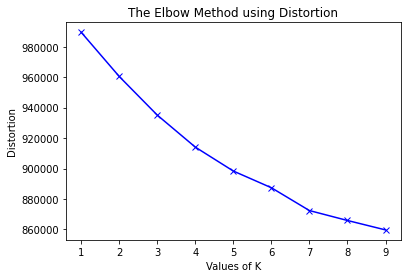

In [122]:
#From the ground truth, we know the no.of clusters are 4(4 categories of news). Lets use Elbow menthod to check no.of clusters
#finding the optimal value of K using elbow method

Distortion=[]
for x in range(1,10):
  kmeans = KMeans(n_clusters=x,max_iter=50)
  kmeans.fit(TF_IDF_final)
  Distortion.append(kmeans.inertia_)

#plot to view the optimal value of K
K = range(1, 10)
plt.plot(K, Distortion, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

*The Cluster sare Not Appropiate per TF-IDF. FOr the case of simplicity, lets consider clusters=4 based on news category*

In [ ]:
#perform Kmeans clustering with value as 4 per the exisitng category of news
k = 4
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=5)
km.fit(TF_IDF_final)

KMeans(max_iter=100, n_clusters=4, n_init=5)

In [ ]:
clusters={}
for x in km.labels_:
  if x in clusters.keys():
    clusters[x]+=1
  else:
    clusters[x]=1

<BarContainer object of 4 artists>

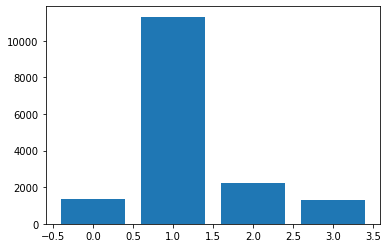

In [ ]:
plt.bar(clusters.keys(),clusters.values())

In [ ]:
#perform Tsne manifold learning for dimensional reduction, visulaization in 2d space
tsne_model = TSNE(n_components = 2, verbose = 1, random_state = 32, n_iter = 500)
tsne_kmeans = tsne_model.fit_transform(TF_IDF_final)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16242 samples in 0.003s...
[t-SNE] Computed neighbors for 16242 samples in 9.675s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16242
[t-SNE] Computed conditional probabilities for sample 2000 / 16242
[t-SNE] Computed conditional probabilities for sample 3000 / 16242
[t-SNE] Computed conditional probabilities for sample 4000 / 16242
[t-SNE] Computed conditional probabilities for sample 5000 / 16242
[t-SNE] Computed conditional probabilities for sample 6000 / 16242
[t-SNE] Computed conditional probabilities for sample 7000 / 16242
[t-SNE] Computed conditional probabilities for sample 8000 / 16242
[t-SNE] Computed conditional probabilities for sample 9000 / 16242
[t-SNE] Computed conditional probabilities for sample 10000 / 16242
[t-SNE] Computed conditional probabilities for sample 11000 / 16242
[t-SNE] Computed conditional probabilities for sample 12000 / 16242
[t-SNE] Computed conditional probabilities for sam

In [ ]:
tsne_df=pd.DataFrame(tsne_kmeans)
tsne_df['category']=km.labels_

In [ ]:
tsne_df

,0,1,category
0,20.997007,21.636431,2
1,7.130578,-8.413656,1
2,4.927170,28.136961,2
3,6.451202,21.408197,1
4,4.992967,26.630413,2
...,...,...,...
16237,-15.885194,-21.286701,1
16238,-10.015526,0.723189,1
16239,14.614080,-23.689566,3
16240,12.976857,-28.340670,3


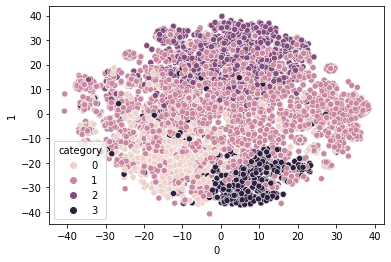

In [ ]:
sns.scatterplot(data=tsne_df,x=0,y=1,hue="category")

### **CASE2 : WORDVECTOR ON THE WORDLIST AND THEN KMEANS CLUSTER AND VISUALIZE**

Since, We have not taken semantic similarity into consideration. Lets use them and perform analysis.

Fist, lets check which words belong to which category of Documents

In [ ]:
tt=Document_Term.iloc[:,:-2].apply(lambda row: row[row == 1].index.tolist(), axis=1).to_frame()

In [ ]:
tt['category']=Document_Term.iloc[:,-1]
tt['category_name']=Document_Term.iloc[:,-2]

In [ ]:
final = tt.rename(columns={0:'word_list_in_category'}).groupby(['category','category_name'])['word_list_in_category'].agg(sum).to_frame()

In [ ]:
#finding words for each category of news for understanding
final

,,word_list_in_category
category,category_name,
1,comp.*,"[email, research, software, system, video, sta..."
2,rec.*,"[car, dealer, problem, state, bmw, car, drive,..."
3,sci.*,"[data, government, problem, space, war, water,..."
4,talk.*,"[bible, card, case, christian, drive, earth, f..."


In [ ]:
#import spacy
import spacy
nlp  = spacy.load('en_core_web_md')

In [60]:
#lets parse through all the 100 words from word_list and create word vectors
vec_word_list = []
for i in word_list:
    vec_word_list.append(nlp(str(i)).vector)

In [125]:
# word vectors with size of 300 dimensions and total 100 words
np.shape(vec_word_list)

(100, 300)

In [62]:
#Clustering using K-means
kmeans_news = KMeans(n_clusters=4).fit(vec_word_list)
print("silhouette_score -", silhouette_score(vec_word_list, kmeans_news.labels_, metric='euclidean'))
print("calinski_harabasz_score -", calinski_harabasz_score(vec_word_list, kmeans_news.labels_))
print("davies_bouldin_score -", davies_bouldin_score(vec_word_list, kmeans_news.labels_))

silhouette_score - 0.072478764
calinski_harabasz_score - 6.080093359493591
davies_bouldin_score - 2.9922003660650214


In [75]:
#lets perform PCA on the word vectors
pca=PCA(n_components=40)
words_pca = pca.fit_transform(vec_word_list)

In [76]:
print("explained variance ratio", pca.explained_variance_ratio_)
print("total explained variance ratio", sum(pca.explained_variance_ratio_))
print("explained variance", pca.explained_variance_)

explained variance ratio [0.08322874 0.068238   0.06152483 0.04438839 0.04223255 0.03961498
 0.03250267 0.02657561 0.02445024 0.0236237  0.0214628  0.02031845
 0.01926848 0.01846854 0.01806002 0.01701019 0.01600121 0.01510389
 0.01490282 0.01410449 0.01313328 0.01234604 0.01208602 0.01164131
 0.011548   0.01104254 0.0106445  0.01032036 0.01012942 0.00960688
 0.00952007 0.00888377 0.0087495  0.00859895 0.00844751 0.00819126
 0.00783627 0.00772555 0.00743251 0.00713158]
total explained variance ratio 0.8160959190893845
explained variance [3.26119323 2.67380349 2.41075815 1.73929234 1.6548191  1.55225338
 1.2735682  1.04132555 0.95804577 0.92565911 0.84098746 0.79614798
 0.75500639 0.72366196 0.70765459 0.66651893 0.62698327 0.59182338
 0.58394483 0.55266328 0.51460794 0.48376112 0.47357261 0.45614745
 0.45249101 0.43268527 0.41708864 0.40438784 0.39690628 0.37643121
 0.37302976 0.3480972  0.3428362  0.33693695 0.33100318 0.32096225
 0.30705246 0.30271402 0.29123194 0.27944027]


In [78]:
#perform T-SNE
tsne_model = TSNE(n_components = 2, verbose = 1, random_state = 32, n_iter = 500)
tsne_kmeans = tsne_model.fit_transform(words_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.056893
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.998772
[t-SNE] KL divergence after 500 iterations: 0.565625


In [82]:
tsne_vec_df=pd.DataFrame(tsne_kmeans)
tsne_vec_df['category']=kmeans_news.labels_
tsne_vec_df['word_list']=word_list

In [83]:
tsne_vec_df

,0,1,category,word_list
0,9.828806,2.545956,2,aids
1,-17.478102,-20.703594,3,baseball
2,2.801995,-16.256153,1,bible
3,16.027641,-23.536808,2,bmw
4,22.523954,0.048986,2,cancer
...,...,...,...,...
95,15.983868,-5.776386,2,water
96,16.387524,-15.797662,3,win
97,-6.464681,23.057915,0,windows
98,18.473295,-15.386323,3,won


In [103]:
#print count per category of words
tsne_vec_df.groupby('category')['word_list'].count()

category
0    24
1    22
2    41
3    13
Name: word_list, dtype: int64

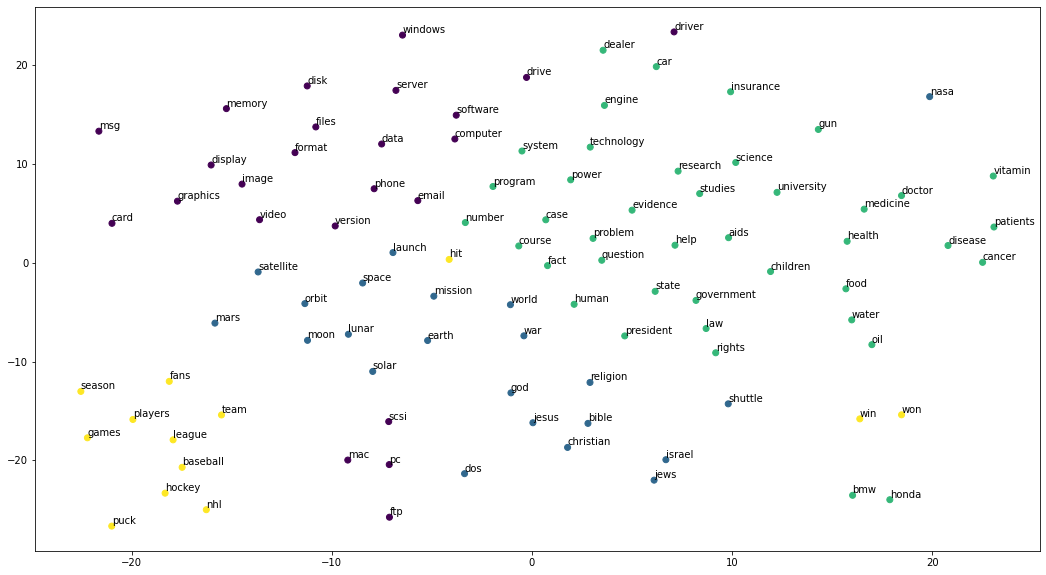

In [102]:
#visualize words with cluster categories
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
ax.scatter(tsne_vec_df[0], tsne_vec_df[1],c=tsne_vec_df['category'])
text = tsne_vec_df['word_list']
for i in range(len(text)):
    plt.annotate(text[i], (tsne_vec_df.iloc[i,0], tsne_vec_df.iloc[i,1] + 0.2))